In [17]:
''' create dataset, 
select random n characters from a unicode range
create images from selected characters, these will be used in minibatches
'''

import numpy as np
from PIL import ImageFont, ImageDraw, Image


unicode_range = [
    (0x3400, 0x4dbf), # CJK unified ideographs (Common and Uncommon Kanji)
    (0x4e00, 0x9faf) # CJK unified ideographs extension A (Rare Kanji)
]

available_chars = [c for r in unicode_range for c in range(r[0], r[1]+1)]
n_chars = len(available_chars)

def image_from_txt(txt):
    max_x, max_y = 32, 32
    font_file = "C:\\Windows\\Fonts\\YuGothic-Bold.ttf"
    image = Image.new("RGBA", (max_x, max_y), (255,255,255))
    draw = ImageDraw.Draw(image)
    
    # try to fit the text perfectly to image (scale)
    fontsize = 1

    font = ImageFont.truetype(font_file, fontsize)
    while font.getsize(txt)[0] < image.size[0] and font.getsize(txt)[1] < image.size[1]:
        fontsize += 1
        font = ImageFont.truetype(font_file, fontsize)

    font = ImageFont.truetype(font_file, fontsize)
    
    horiz_pos = (max_x - font.getsize(txt)[0])/2
    vert_pos = (max_y - font.getsize(txt)[1])/2 - max_y/10

    draw.text((horiz_pos, vert_pos), txt, font=font, fill = (0,0,0))
    return image

def get_random_kanji_image(n):
    # randomly select kanjis within a range
    kanji_ranges = [chr(c) for c in np.random.choice(available_chars, n)]
    
    # create image from selected kanjis
    return np.asarray([np.array(image_from_txt(txt)) for txt in kanji_ranges])

<IPython.core.display.Javascript object>


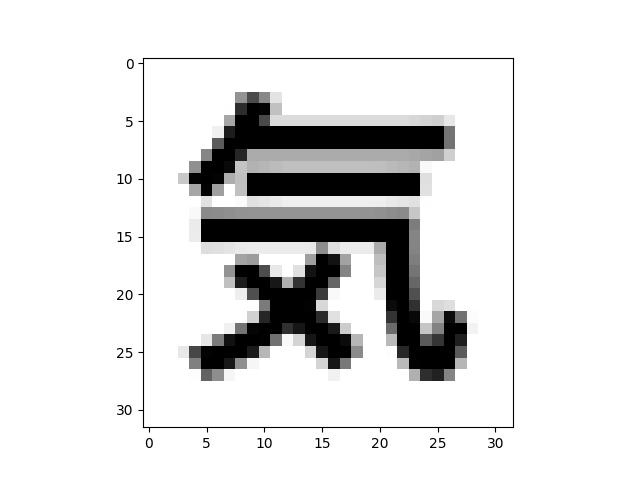

In [18]:
# check image by plotting
%matplotlib notebook
import matplotlib.pyplot as plt

image = image_from_txt('気')
plt.imshow(image)
plt.show()